# Part 2B - Evaluate whether older planes suffer more delays on a year-to-year basis

In [2]:
#imports
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

### Pre-Processing

##### Planes Data

In [5]:
# preparing planes data
planes = pd.read_csv('dataset/plane-data.csv')
planes = planes[['tailnum','issue_date']]
planes['tailnum'] = planes['tailnum'].astype(str)
planes = planes.dropna()
planes.head()

,tailnum,issue_date
34,N10156,02/13/2004
35,N102UW,05/26/1999
36,N10323,07/01/1997
37,N103US,06/18/1999
38,N104UA,01/26/1998


In [6]:
len(planes)

4479

In [7]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4479 entries, 34 to 5028
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tailnum     4479 non-null   object
 1   issue_date  4479 non-null   object
dtypes: object(2)
memory usage: 105.0+ KB


In [8]:
planes.isna().sum()

tailnum       0
issue_date    0
dtype: int64

##### Flight Data

In [10]:
years = pd.concat([pd.read_csv(f"dataset/{year}.csv", encoding='latin-1') for year in range(1995,2005)])
years = years[['Year','ArrDelay','TailNum']]
years.columns = years.columns.str.lower()
years = years.dropna()
years.head()

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_62803/1343637520.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  years = pd.concat([pd.read_csv(f"dataset/{year}.csv", encoding='latin-1') for year in range(1995,2005)])


,year,arrdelay,tailnum
0,1995,15.0,N7298U
1,1995,1.0,N7449U
2,1995,-5.0,N7453U
3,1995,-9.0,N7288U
4,1995,-6.0,N7275U


In [11]:
len(years)

56089628

In [12]:
years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56089628 entries, 0 to 7129269
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      int64  
 1   arrdelay  float64
 2   tailnum   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ GB


In [13]:
years.isna().sum()

year        0
arrdelay    0
tailnum     0
dtype: int64

##### Combined Dataset

In [15]:
df = pd.merge(years,planes,on='tailnum', how='left')
del(planes)
del(years)

In [16]:
df.head()

,year,arrdelay,tailnum,issue_date
0,1995,15.0,N7298U,NaN
1,1995,1.0,N7449U,NaN
2,1995,-5.0,N7453U,NaN
3,1995,-9.0,N7288U,NaN
4,1995,-6.0,N7275U,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56089628 entries, 0 to 56089627
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   year        int64  
 1   arrdelay    float64
 2   tailnum     object 
 3   issue_date  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ GB


In [18]:
df.isna().sum()

year                 0
arrdelay             0
tailnum              0
issue_date    34862113
dtype: int64

In [19]:
df = df.dropna()
df.isna().sum()

year          0
arrdelay      0
tailnum       0
issue_date    0
dtype: int64

In [20]:
df['issue_year'] = [str(date).split('/')[2] for date in df['issue_date']]
df['issue_year'] = df['issue_year'].astype(int)
df['age'] = df['year'] - df['issue_year']

In [21]:
df = df[df['age']>=0][['year','age','arrdelay']]
len(df)

15804666

In [22]:
df = df.groupby(['year','age']).mean().reset_index()
df.head()

,year,age,arrdelay
0,1995,0,6.317687
1,1995,1,4.910103
2,1995,2,7.139287
3,1995,3,6.505662
4,1995,4,7.205266


### Pearson's Correlation Test

In [24]:
r_vals = []
p_vals = []

for year in range(1995,2005):
    x = df[df['year']==year]['age']
    y = df[df['year']==year]['arrdelay']
    r,p = pearsonr(x,y)
    r_vals.append(r)
    p_vals.append(p)

r_vals = np.array(r_vals).reshape((2,5))
p_vals = np.array(p_vals).reshape((2,5))

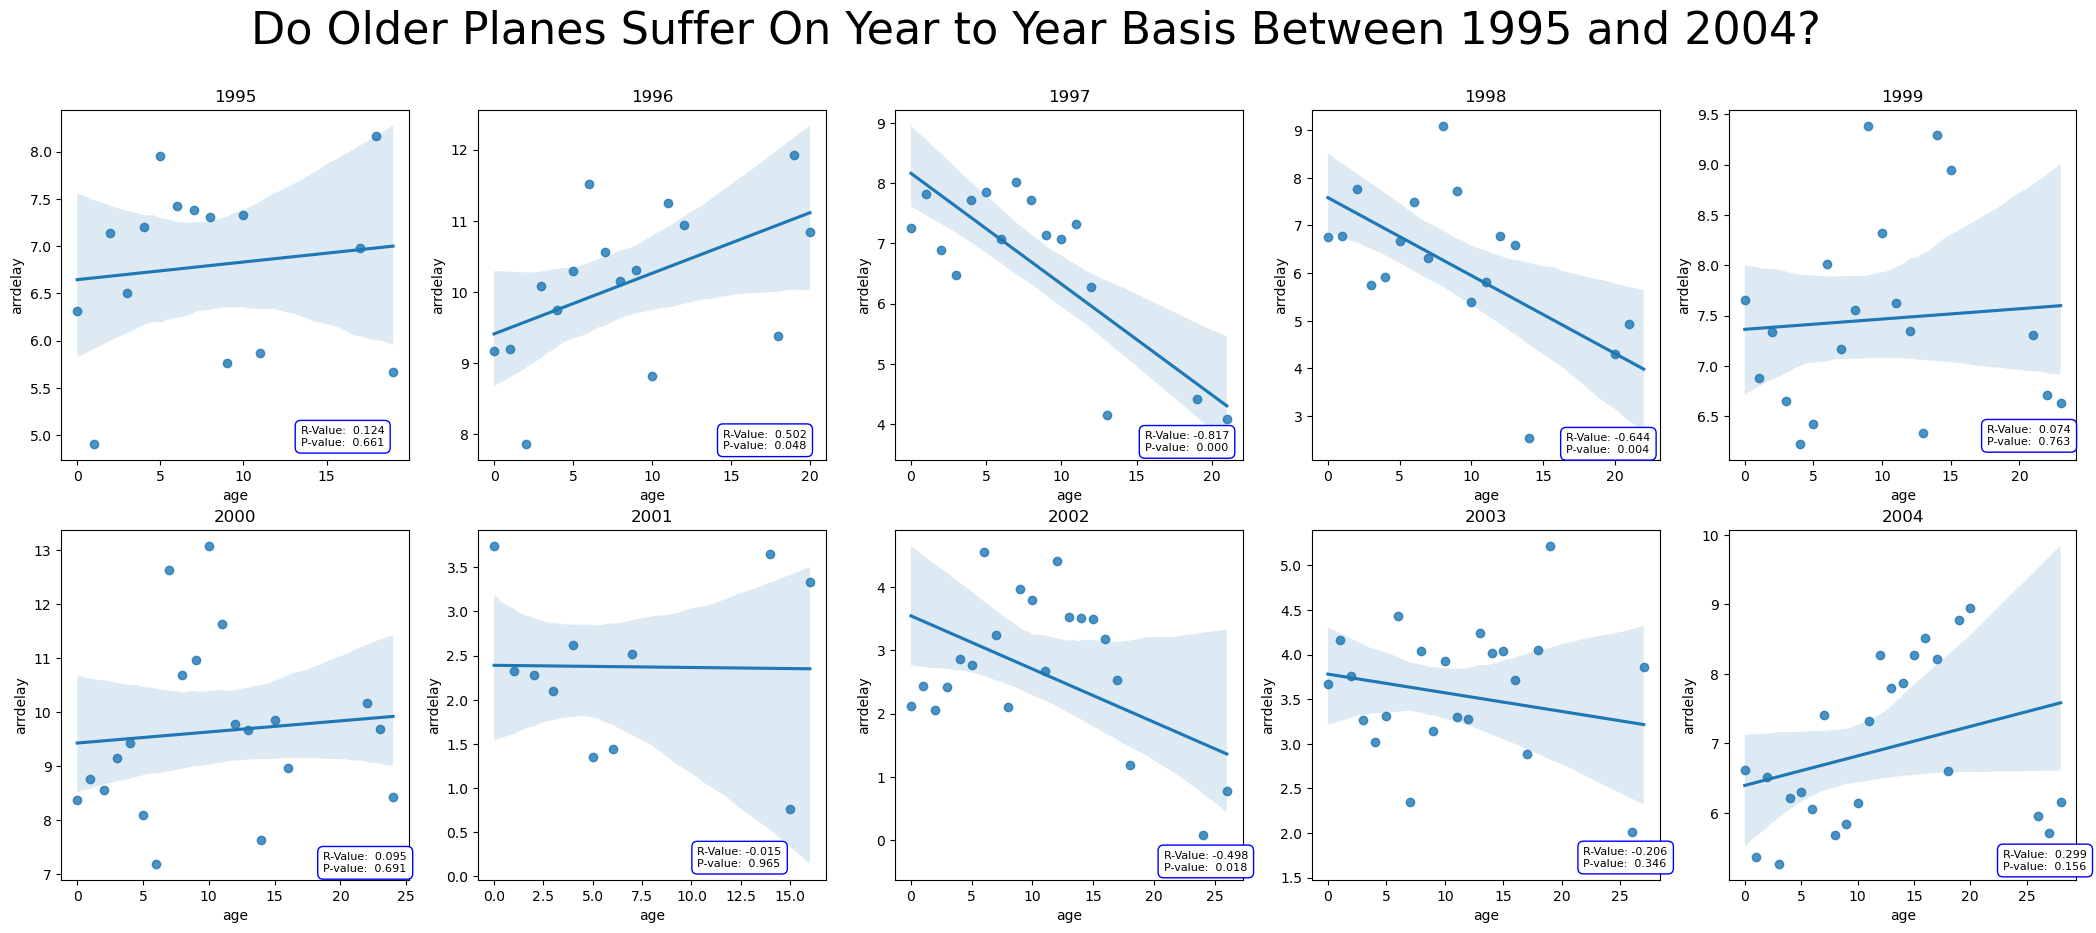

In [25]:
fig, ax = plt.subplots(figsize=(26,10), nrows=2, ncols=5)
years = df['year'].unique().reshape(2,5)

for x in range(2):
    for y in range(5):
        sns.regplot(x='age', y='arrdelay', data=df[df['year']==years[x][y]], ax=ax[x][y])
        xmin, xmax = ax[x][y].get_xlim()
        ymin, ymax = ax[x][y].get_ylim()
        
        ax[x][y].text(xmax-6.5,ymin+0.15,f'R-Value: {r_vals[x][y]: .3f}\nP-value: {p_vals[x][y]: .3f}'
                     ,fontsize=8, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
        ax[x][y].set(title=years[x][y])

fig.suptitle("Do Older Planes Suffer More Delays On Year to Year Basis Between 1995 and 2004?", fontsize=32)
plt.show()